# Kernel Ridge Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate training samples
N = 100 # Number of training samples
# Generate equispaced floats in the interval [0, 2π]
X = np.linspace(0, 2*np.pi, N)
# Generate noise
mean = 0
std = 0.05
# Generate some numbers from the sine function
y = np.sin(X) + np.random.normal(mean, std, N)

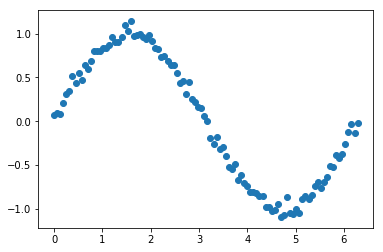

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
# RBF Kernel
def rbf_kernel(x, y, gamma=0.5):
    # gamma = 1/(2*sigma^2) - from Wikipedia
    assert gamma>0, 'gamma must be positive'
    k = np.exp(-gamma * np.linalg.norm(x-y)**2)
    return k

In [5]:
# find K
K = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        K[i,j] = rbf_kernel(X[i], X[j], gamma=10)
    

In [6]:
def optimal_weights(K, y, l):
    n = len(y)
    alphas = np.linalg.inv(K + n*l*np.identity(n)) @ y
    return alphas

In [7]:
alphas = optimal_weights(K,y,l=1)

In [8]:
def predict(x, alphas, X, gamma):
    fx = np.sum([alphas[i]*rbf_kernel(x,X[i], gamma=gamma) for i in range(N)])
    return fx

In [13]:
Z = np.linspace(0, 2*np.pi, 30) + np.random.normal(0, 0.05, 30)
zy = np.array([predict(z, alphas, X, gamma=10) for z in Z])

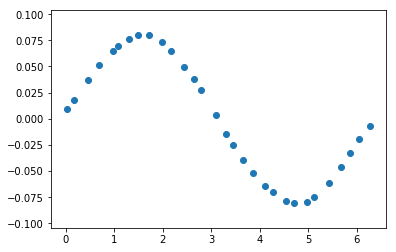

In [14]:
plt.scatter(Z,zy)
plt.show()